# Shopping Customer Segmentation

Problem Statement: To understand the Target Customers for the marketing team to plan a strategy.

### Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
#dimension
df.shape

(200, 5)

In [31]:
#Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

#### Handling Missing Values:

In [37]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


No Null values

## Univariate Analysis

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Distribution plot

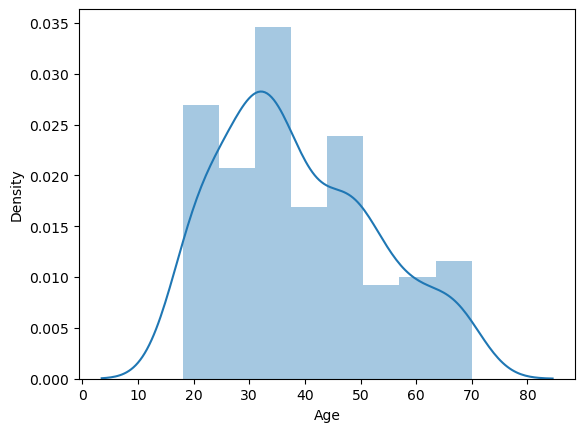

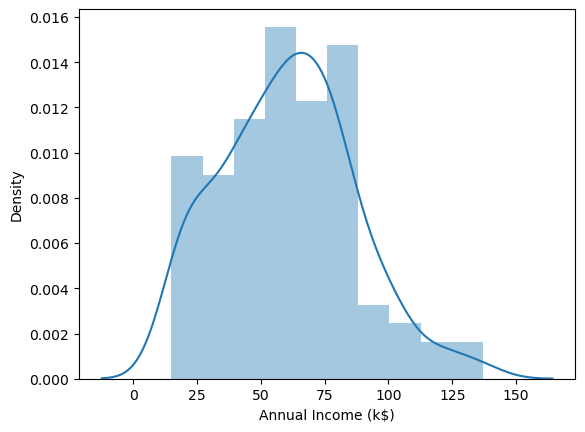

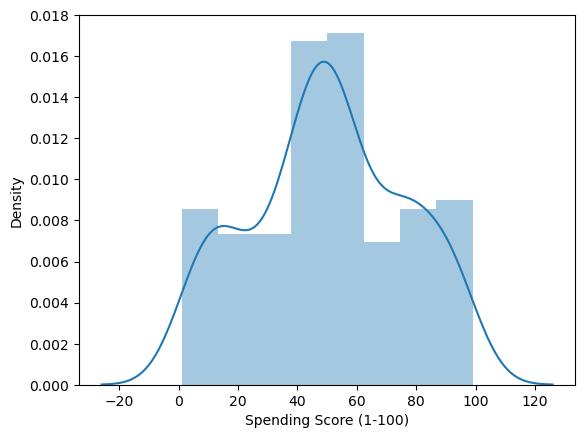

In [8]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

Most of the annual income falls between 50K to 85K 
Customers are of a wide variety of age 
The maximum spending score is in the range of 40 to 60.

## Gender Analysis

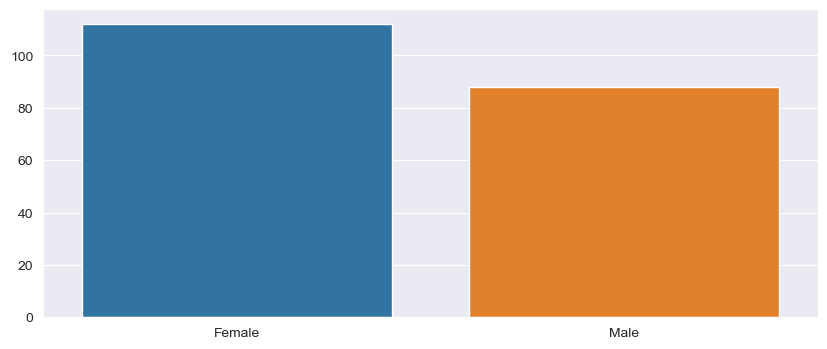

In [15]:
genders=df.Gender.value_counts()
sns.set_style("darkgrid")
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

More female customers than male.

In [47]:
males_age=df[df['Gender']=='Male']['Age']
females_age=df[df['Gender']=='Female']['Age']

Text(45, 19, 'Mean Age: 38.1')

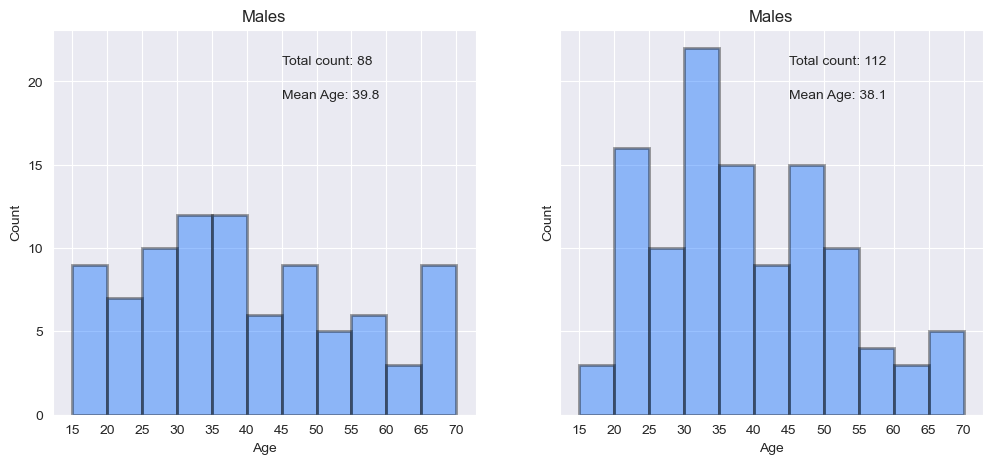

In [60]:
age_bins=range(15,75,5)
fig2,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5),sharey=True)
sns.distplot(males_age,bins=age_bins,kde=False,color="#0066ff",ax=ax1,hist_kws=dict(edgecolor="k",linewidth=2))
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.set_xticks(age_bins)

ax1.text(45,21,"Total count: {}".format(males_age.count()))
ax1.text(45,19,"Mean Age: {:.1f}".format(males_age.mean()))
sns.distplot(females_age,bins=age_bins,kde=False,color="#0066ff",ax=ax2,hist_kws=dict(edgecolor="k",linewidth=2))
ax2.set_title('Males')
ax2.set_ylabel('Count')
ax2.set_xticks(age_bins)
ax2.text(45,21,"Total count: {}".format(females_age.count()))
ax2.text(45,19,"Mean Age: {:.1f}".format(females_age.mean()))

Average Age of Male customers is slightly higher rhan females. Distribution of male age is more uniform. 

### KDE plot by Gender

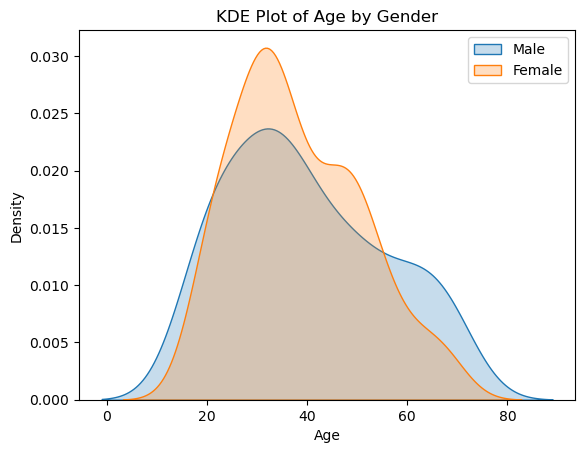

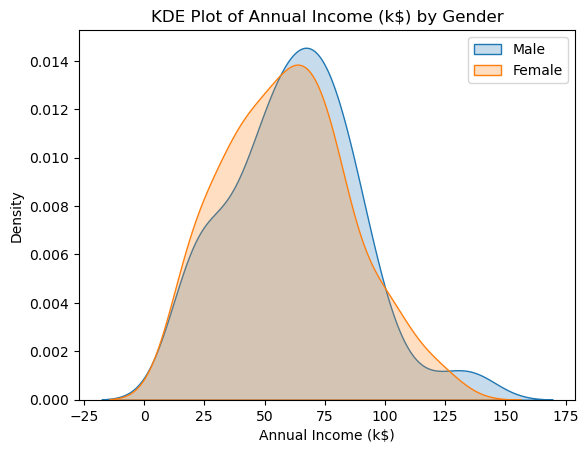

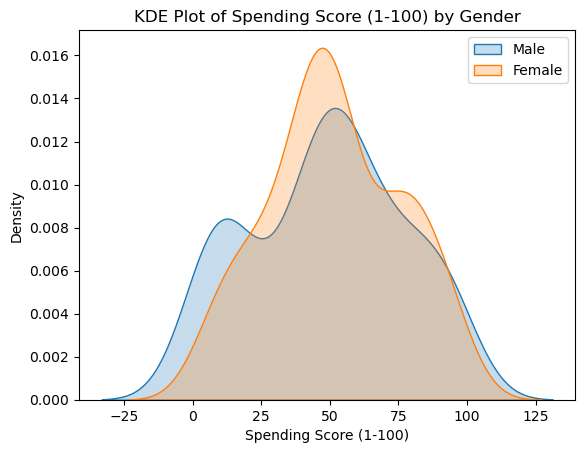

In [13]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for col in columns:
    plt.figure()
    sns.kdeplot(data=df[df['Gender'] == 'Male'][col], shade=True, label='Male')
    sns.kdeplot(data=df[df['Gender'] == 'Female'][col], shade=True, label='Female')
    plt.title(f'KDE Plot of {col} by Gender')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


### Box Plot

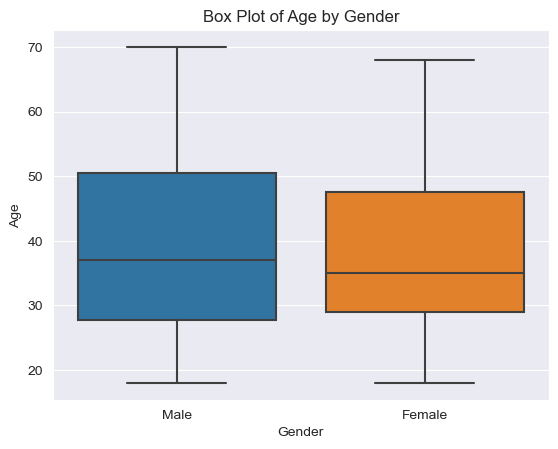

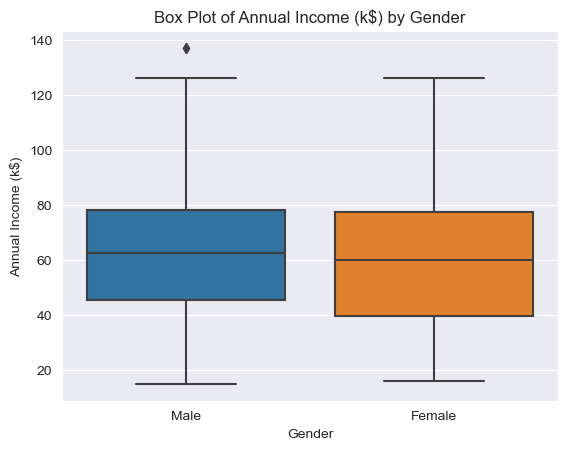

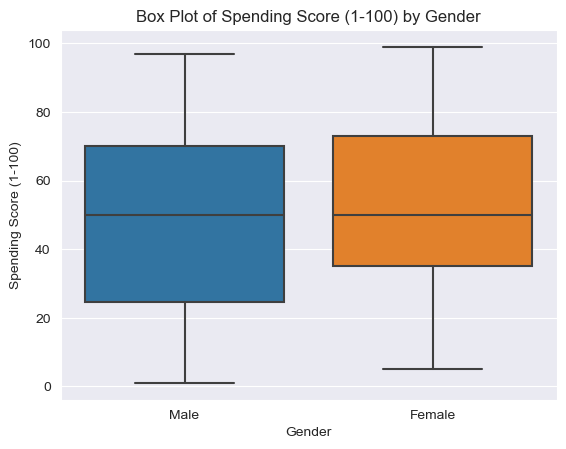

In [17]:
for col in columns:
    plt.figure()
    sns.boxplot(x='Gender', y=col, data=df)
    plt.title(f'Box Plot of {col} by Gender')
    plt.xlabel('Gender')
    plt.ylabel(col)
    plt.show()


No Outliers

It is clearly visible that most of the males have a Spending Score of around 25  to 70  whereas the Females have a spending score of around 35 to 75. which again points to the fact that women are Shopping Leaders.

There are more males who get paid more than females. But, The number of males and females is equal in number when it comes to low annual income.

## Annual Income Analysis

In [62]:
males_income=df[df['Gender']=='Male']['Annual Income (k$)']
females_income=df[df['Gender']=='Female']['Annual Income (k$)']

Text(45, 10, 'Std: 26.0')

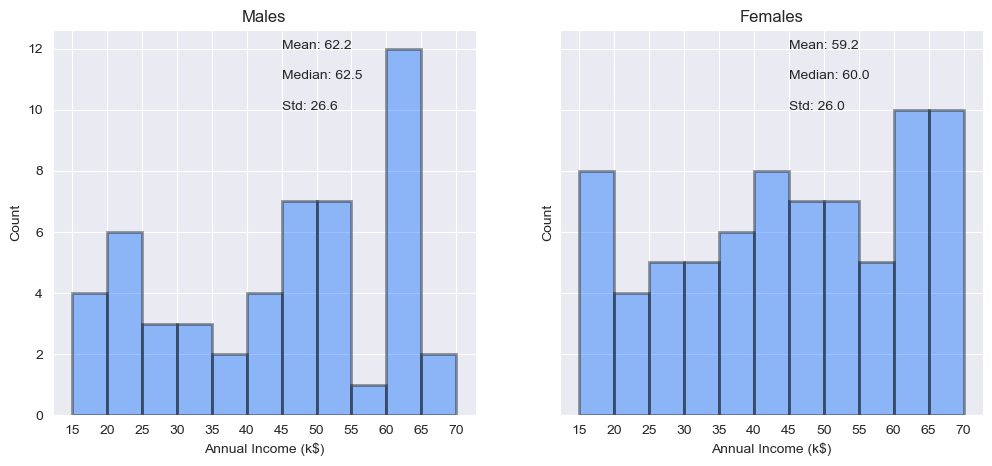

In [69]:
age_bins=range(15,75,5)
fig2,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5),sharey=True)
sns.distplot(males_income,bins=age_bins,kde=False,color="#0066ff",ax=ax1,hist_kws=dict(edgecolor="k",linewidth=2))
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.set_xticks(age_bins)

ax1.text(45,12,"Mean: {:.1f}".format(males_income.mean()))
ax1.text(45,11,"Median: {:.1f}".format(males_income.median()))
ax1.text(45,10,"Std: {:.1f}".format(males_income.std()))
sns.distplot(females_income,bins=age_bins,kde=False,color="#0066ff",ax=ax2,hist_kws=dict(edgecolor="k",linewidth=2))
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.set_xticks(age_bins)
ax2.text(45,12,"Mean: {:.1f}".format(females_income.mean()))
ax2.text(45,11,"Median: {:.1f}".format(females_income.median()))
ax2.text(45,10,"Std: {:.1f}".format(females_income.std()))


Mean & Median of Annual Income is greater in Males.

## Spending Score Analysis

In [72]:
males_score=df[df['Gender']=='Male']['Spending Score (1-100)']
females_score=df[df['Gender']=='Female']['Spending Score (1-100)']

Text(47, 13, 'Std: 24.1')

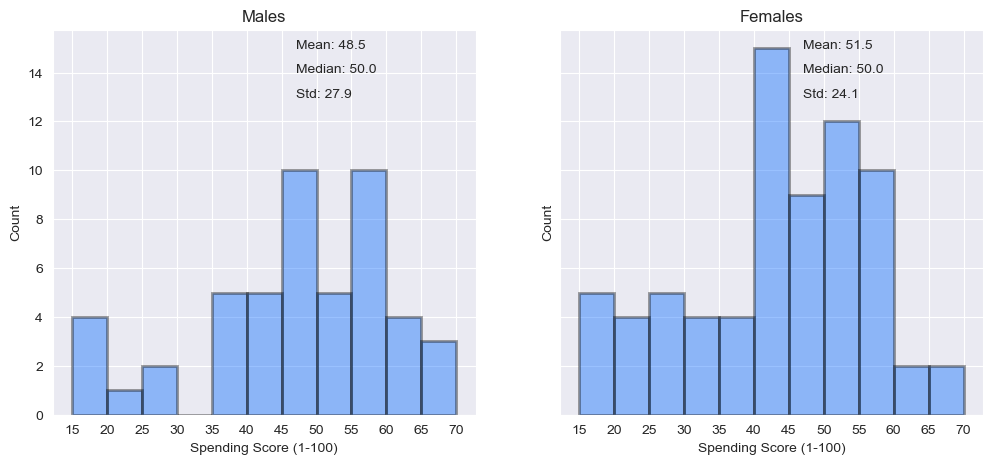

In [76]:
age_bins=range(15,75,5)
fig2,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5),sharey=True)
sns.distplot(males_score,bins=age_bins,kde=False,color="#0066ff",ax=ax1,hist_kws=dict(edgecolor="k",linewidth=2))
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.set_xticks(age_bins)

ax1.text(47,15,"Mean: {:.1f}".format(males_score.mean()))
ax1.text(47,14,"Median: {:.1f}".format(males_score.median()))
ax1.text(47,13,"Std: {:.1f}".format(males_score.std()))
sns.distplot(females_score,bins=age_bins,kde=False,color="#0066ff",ax=ax2,hist_kws=dict(edgecolor="k",linewidth=2))
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.set_xticks(age_bins)
ax2.text(47,15,"Mean: {:.1f}".format(females_score.mean()))
ax2.text(47,14,"Median: {:.1f}".format(females_score.median()))
ax2.text(47,13,"Std: {:.1f}".format(females_score.std()))

A mean Spending score for female is higher than males

## Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

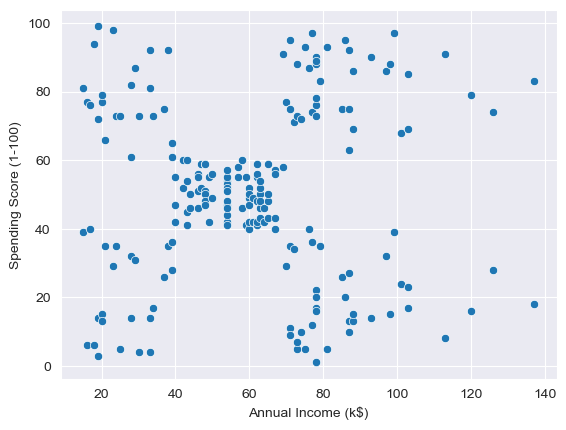

In [18]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' )

No clear relationship between income and spending score, though clusters seem to form

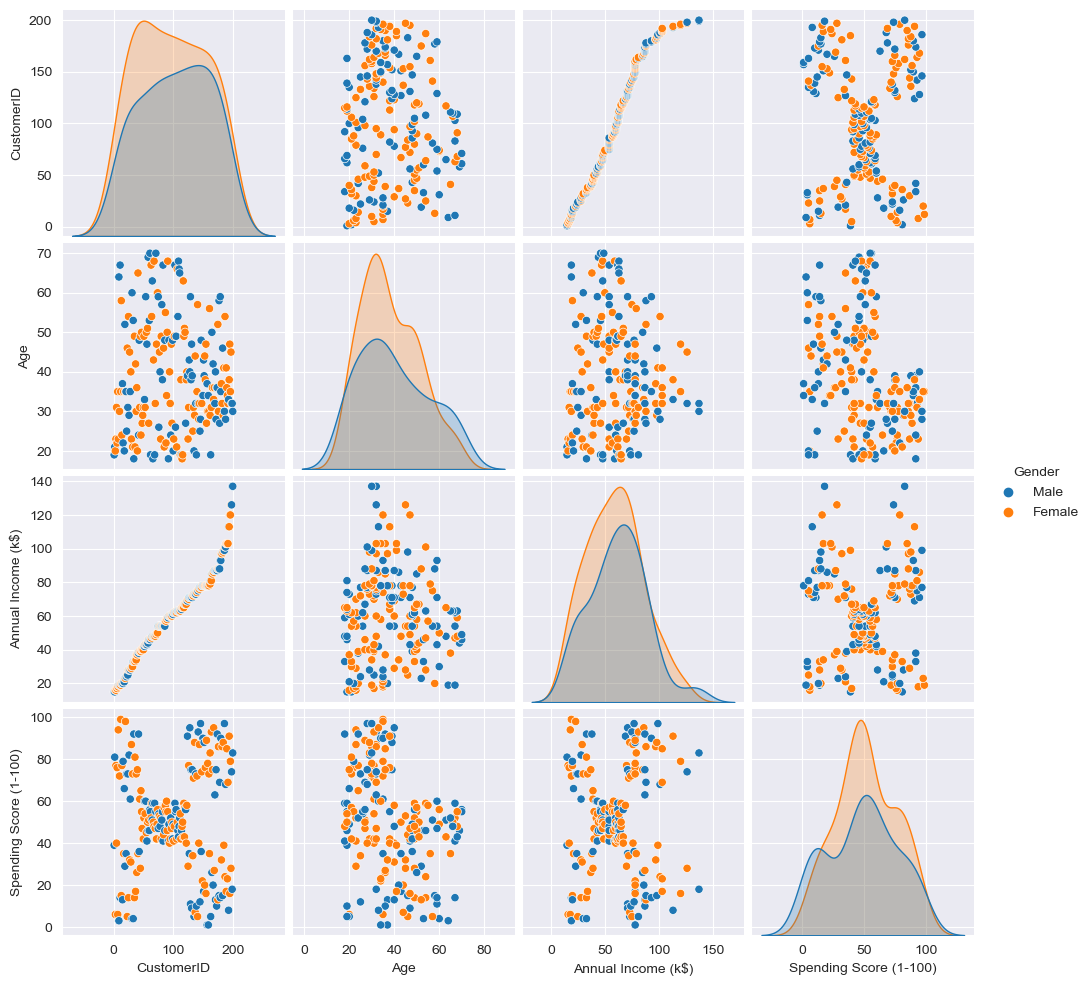

In [19]:
sns.pairplot(df,hue='Gender')

In [20]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


### Age Buckets

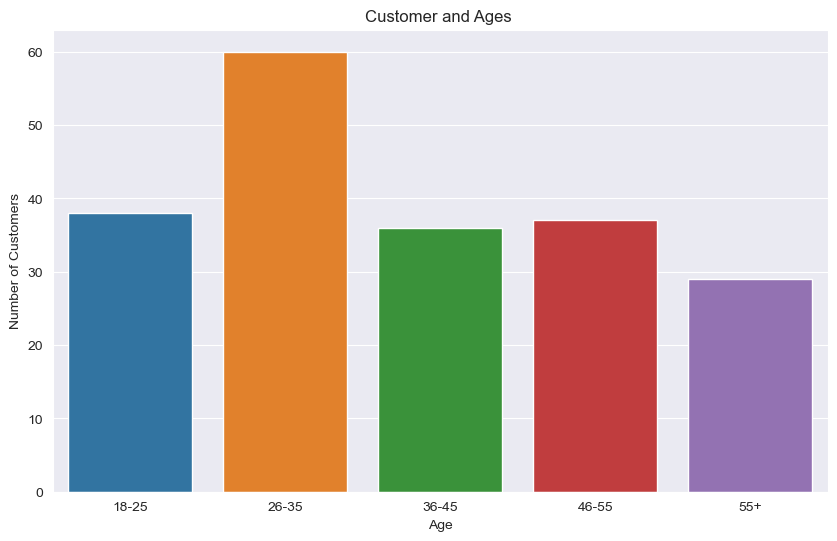

In [27]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y)
plt.title("Customer and Ages ")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

26-35 Age group has the maximum no of customers

### Spending Score Buckets

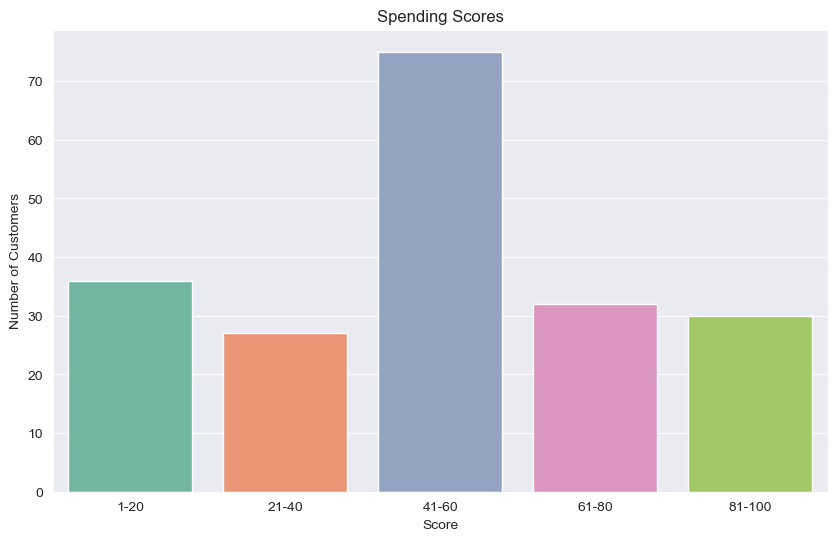

In [29]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

score_x = ["1-20", "21-40", "41-60", "61-80", "81-100"]
score_y = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=score_x, y=score_y,palette="Set2")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customers")
plt.show()

Most of the cusmors give a score 41-60

## Annual Income (1000 dollars)

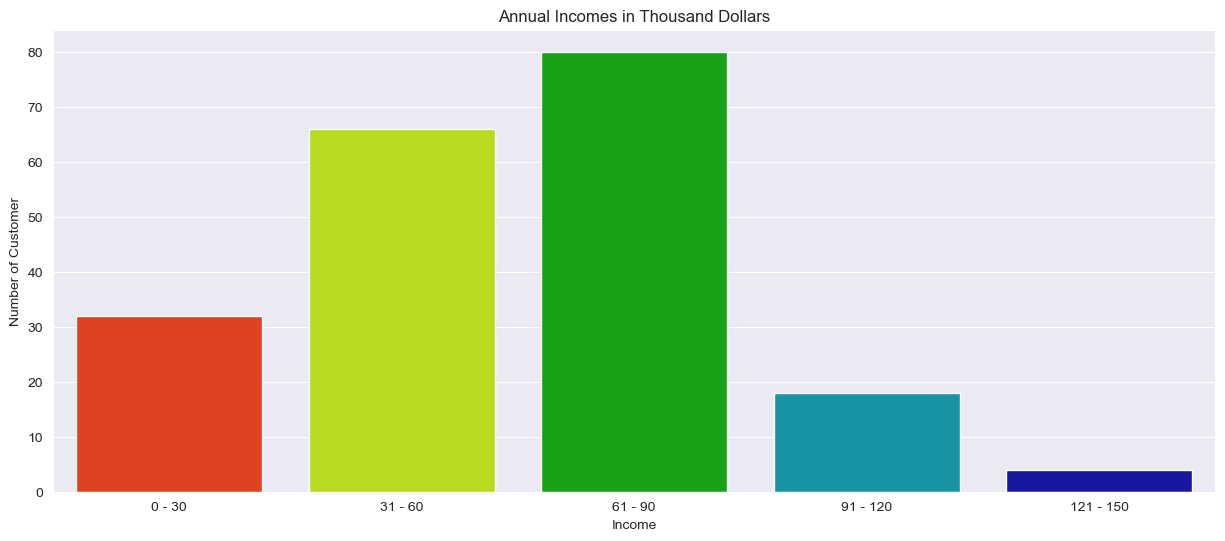

In [30]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

income_x = ["0 - 30","31 - 60", "61 - 90", "91 - 120", "121 - 150"]
income_y = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=income_x, y=income_y, palette="nipy_spectral_r")
plt.title("Annual Incomes in Thousand Dollars")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

Most of the customers have annual income between 61-90 thousand$

## Multivariate Analysis

### Annual Income vs Age and Spending Score

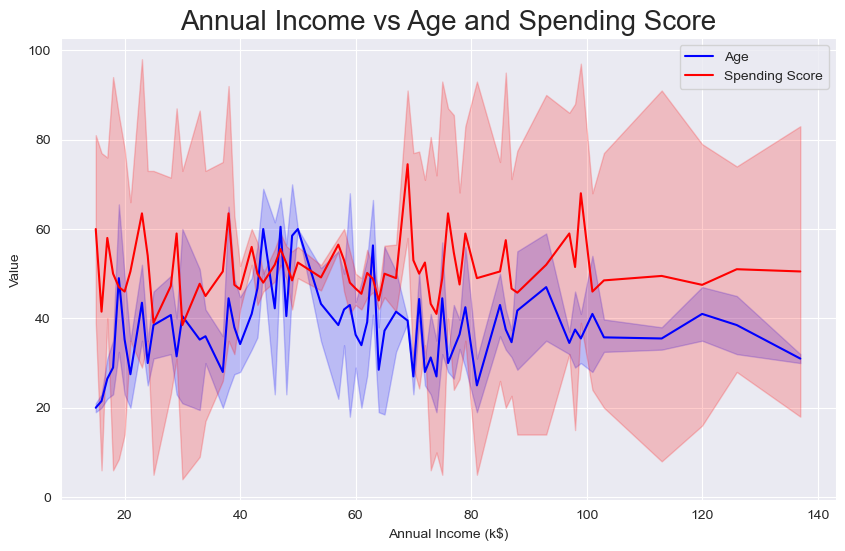

In [36]:
x = df['Annual Income (k$)']
y = df['Age']
z = df['Spending Score (1-100)']

plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=y, color='blue', label='Age')
sns.lineplot(x=x, y=z, color='red', label='Spending Score')
plt.title('Annual Income vs Age and Spending Score', fontsize=20)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Value')
plt.legend()
plt.show()


The above Plot Between Annual Income and Age represented by a blue color line and a plot between Annual Income and the Spending Score is represented by a red color. It shows how Age and Spending Vary with Annual Income.

## Correlation

In [21]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


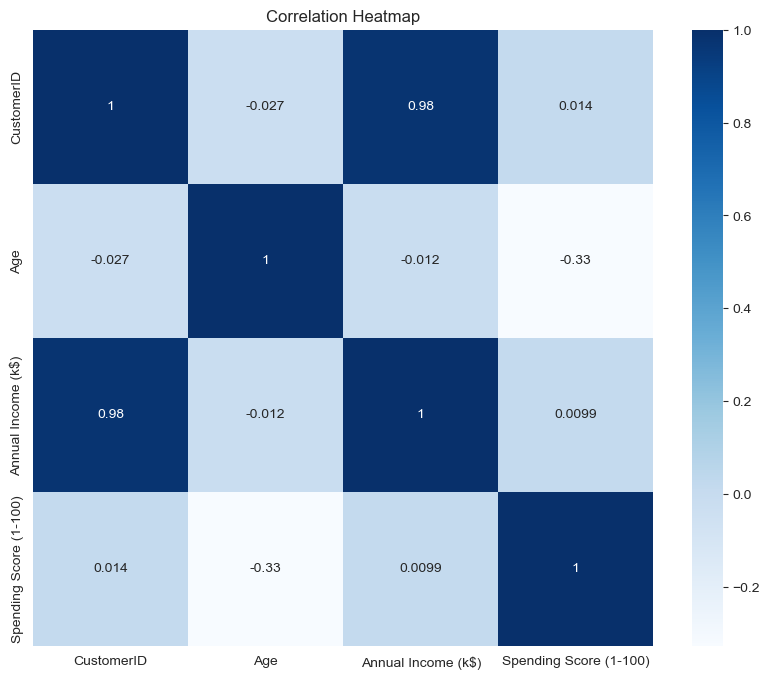

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')  
plt.title('Correlation Heatmap')
plt.show()


There is not much correlation between variables, though there is a slight inverse relationship between age and spending score (-.33)